In [1]:
# package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# Mapping When LIHTC Properties are Built in Atlanta
#### First, I have to manage spelling variations and proj_cty variations to know what I'm working with.

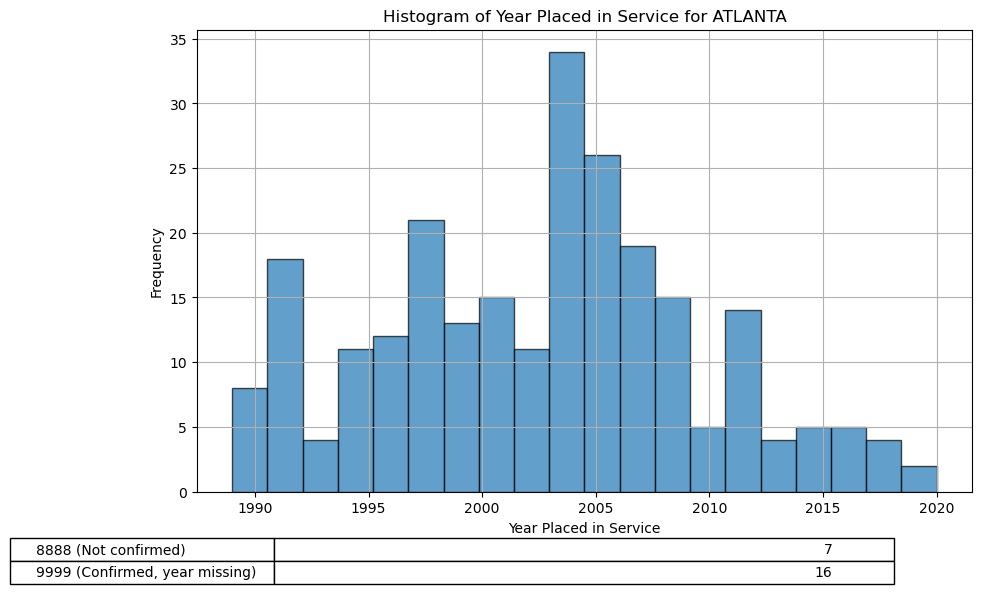

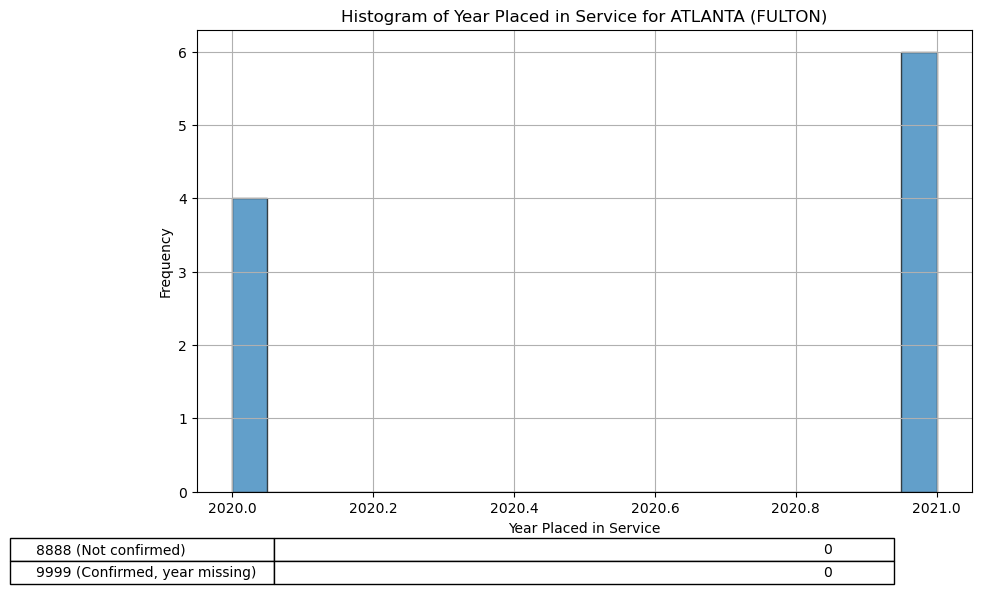

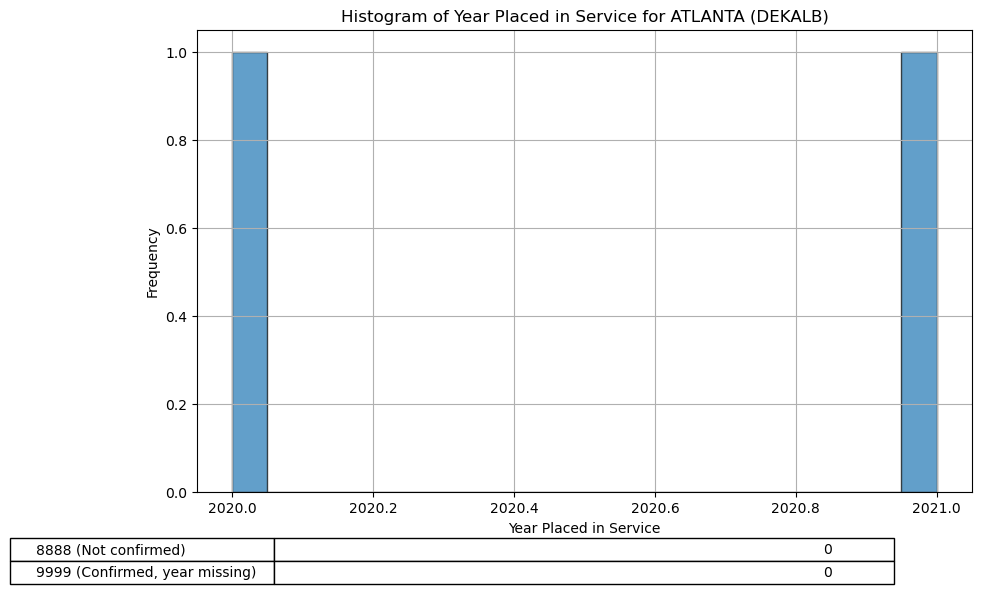

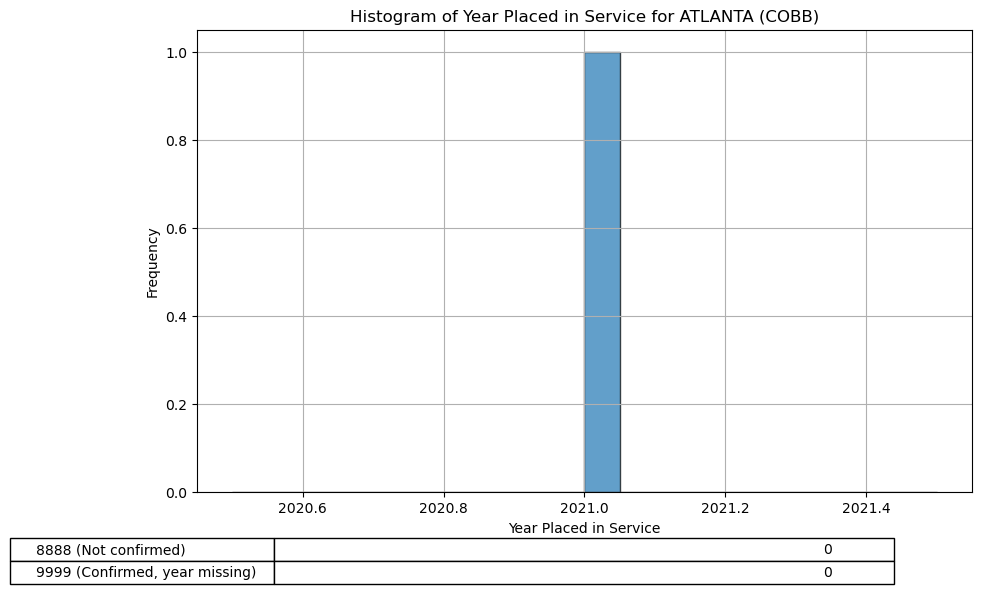

In [2]:
# Read in the CSV file and filter for Atlanta entries
columns = ['proj_cty', 'proj_st', 'yr_pis']
df = pd.read_csv('lihtcpub/LIHTCPUB.CSV', usecols=columns)

# Correct 'proj_cty' entry for 'ALTANTA' to 'ATLANTA'
df.loc[df['proj_cty'] == 'ALTANTA', 'proj_cty'] = 'ATLANTA'

# Drop rows with missing values in 'proj_cty' column
df.dropna(subset=['proj_cty'], inplace=True)

# Filter out variations of 'proj_cty' that are not desired
undesired_variations = ['ATLANTIC BEACH', 'ATLANTIC', 'ATLANTIC CITY', 'ATLANTIC CITY TOWNHOUSES']
df = df[~df['proj_cty'].isin(undesired_variations)]

# Filter and create separate tables and graphs for each remaining variation of 'proj_cty'
unique_proj_cty = df[df['proj_cty'].str.startswith('ATL')]['proj_cty'].unique()

for proj_cty_variation in unique_proj_cty:
    # Filter DataFrame for current 'proj_cty' variation
    df_variation = df[df['proj_cty'] == proj_cty_variation]
    
    # Filter out instances where yr_pis is 8888 or 9999
    filtered_df = df_variation[~df_variation['yr_pis'].isin([8888, 9999])]
    
    # Separate the counts of 8888 and 9999
    counts_8888 = df_variation[df_variation['yr_pis'] == 8888].shape[0]
    counts_9999 = df_variation[df_variation['yr_pis'] == 9999].shape[0]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['yr_pis'], bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel('Year Placed in Service')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Year Placed in Service for {proj_cty_variation}')
    plt.grid(True)

    # Show counts of 8888 and 9999 separately in a table
    plt.table(cellText=[[counts_8888], [counts_9999]],
              rowLabels=['8888 (Not confirmed)', '9999 (Confirmed, year missing)'],
              loc='bottom',
              bbox=[0.1, -0.2, 0.8, 0.1])

    plt.show()


#### Now that I know what variations of Atlanta exist, I can call for them specifically in a data frame.

In [3]:
atl_list = ['ALTANTA', 'ATLANTA (DEKALB)', 'ATLANTA (COBB)', 'ATLANTA (FULTON)', 'ATLANTA']

df_atl = pd.read_csv('lihtcpub/LIHTCPUB.CSV')

# Filter the DataFrame to include only rows where 'proj_cty' is in atl_list and 'proj_st' is 'GA'
df_atl = df_atl[(df_atl['proj_cty'].isin(atl_list)) & (df_atl['proj_st'] == 'GA')]

# Now df_atl contains only rows where 'proj_cty' matches values in atl_list and 'proj_st' is 'GA'

df_atl

/var/folders/jm/3pr5r3qn5kj1jbb1kk_lcn8c0000gn/T/ipykernel_80841/3699630930.py:3: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df_atl = pd.read_csv('lihtcpub/LIHTCPUB.CSV')


,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
10074,GAA00000002,AAL AT SCHOLARS LANDING,JOHN HOPE DR & PARSONS ST,ATLANTA,GA,NaN,GA1012-506,NaN,NaN,NaN,...,60.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,PROPERTY RECORD ADDED FROM HUD STUDY DATA FILE.,X
10079,GAA00000012,"CARVER SENIOR BUILDING, LP",217 THIRKIELD AVE SW,ATLANTA,GA,30315,GA0305-454,33.713478,-84.392693,150.0,...,90.0,90.0,2.0,NaN,NaN,NaN,NaN,NaN,PROPERTY RECORD ADDED FROM HUD STUDY DATA FILE.,X
10080,GAA00000013,CENTENNIAL PLACE 1,526 CENTENNIAL OLYMPIC PARK DR NW,ATLANTA,GA,30313,GA1012-479,33.768631,-84.392242,150.0,...,181.0,181.0,2.0,NaN,NaN,NaN,NaN,NaN,PROPERTY RECORD ADDED FROM HUD STUDY DATA FILE.,X
10083,GAA00000026,FULTON COTTON MILL LOFTS,170 BLVD S E BUILDI,ATLANTA,GA,NaN,GA-97-50(B),NaN,NaN,NaN,...,77.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,PROPERTY IDENTIFIED IN 2014 LIHTC TENANT DATA ...,X
10100,GAA00000195,GATEWAY APARTMENTS AT NORTHSIDE VILLAGE,370 NORTHSIDE DR NW,ATLANTA,GA,30318,GA-02-559,33.765217,-84.404442,150.0,...,261.0,261.0,2.0,NaN,NaN,1.0,NaN,NaN,FORECLOSED.,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11592,GAA20210026,LEGENDS OF STONECREST,6757 COVINGTON HWY,ATLANTA (FULTON),GA,30058-4813,2019-513,33.716957,-84.141930,NaN,...,238.0,238.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,N
11593,GAA20210027,MARIETTA SENIOR TOWER,2295 MARIETTA RD NW,ATLANTA (FULTON),GA,30318-1900,2018-534,33.818317,-84.461456,NaN,...,0.0,0.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,N
11596,GAA20210030,PEACHTREE SENIOR TOWER,2240 PEACHTREE ROAD,ATLANTA (FULTON),GA,30309-1124,2018-514,33.815231,-84.391708,NaN,...,196.0,196.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,N
11598,GAA20210032,QUEST COMMONS WEST,891 ROCK STREET NORTHWEST,ATLANTA (FULTON),GA,30314-0000,2017-039,33.762390,-84.416512,NaN,...,53.0,53.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,N


In [4]:
# Retrieving column names for df as a reminder
df_atl.columns

Index(['hud_id', 'project', 'proj_add', 'proj_cty', 'proj_st', 'proj_zip',
       'state_id', 'latitude', 'longitude', 'place1990', 'place2000',
       'place2010', 'fips1990', 'fips2000', 'fips2010', 'st2010', 'cnty2010',
       'scattered_site_cd', 'resyndication_cd', 'allocamt', 'n_units',
       'li_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br', 'inc_ceil',
       'low_ceil', 'ceilunit', 'yr_pis', 'yr_alloc', 'non_prof', 'basis',
       'bond', 'mff_ra', 'fmha_514', 'fmha_515', 'fmha_538', 'home',
       'home_amt', 'tcap', 'tcap_amt', 'cdbg', 'cdbg_amt', 'htf', 'htf_amt',
       'fha', 'hopevi', 'hpvi_amt', 'tcep', 'tcep_amt', 'rad', 'qozf',
       'qozf_amt', 'rentassist', 'trgt_pop', 'trgt_fam', 'trgt_eld',
       'trgt_dis', 'trgt_hml', 'trgt_other', 'trgt_spc', 'type', 'credit',
       'n_unitsr', 'li_unitr', 'metro', 'dda', 'qct', 'nonprog', 'nlm_reason',
       'nlm_spc', 'datanote', 'record_stat'],
      dtype='object')

In [5]:
# Installing geospatial analysis packages
!pip install geopandas
!pip install fiona pyproj

#### I have a near table from ArcGIS Pro I want to do an analysis on, but I need to check what its fields are to see if I can map it geospatially.

In [6]:
# Read the Atlanta city limits shapefile into a GeoDataFrame
transit_df = pd.read_csv('Final_Project/transitneartable.csv')

# Rename the column from NEAR_DIST to DIST_METERS
transit_df.rename(columns={'NEAR_DIST': 'DIST_METERS'}, inplace=True)

# Convert the values from meters to miles
transit_df['DIST_MILES'] = transit_df['DIST_METERS'] * 0.000621371

# Now transit_df contains the original column DIST_METERS and a new column DIST_MILES with values converted to miles
transit_df

,OID_,IN_FID,NEAR_FID,DIST_METERS,DIST_MILES
0,1,23,16,1595.489798,0.991391
1,2,24,16,1571.654676,0.976581
2,3,26,16,1578.863355,0.981060
3,4,27,16,1501.926736,0.933254
4,5,31,39,1824.272749,1.133550
...,...,...,...,...,...
219,220,254,3,306.001220,0.190140
220,221,255,17,1553.247023,0.965143
221,222,256,23,1192.961615,0.741272
222,223,257,34,3822.107992,2.374947


#### It doesn't seem I have any geospatial elements directly in the table. However, each row in this table is a LIHTC property's distance to the nearest MARTA rail station.

#### I can graph this as a histogram to get a sense of how closely (or not) LIHTC is located to rail in Atlanta.

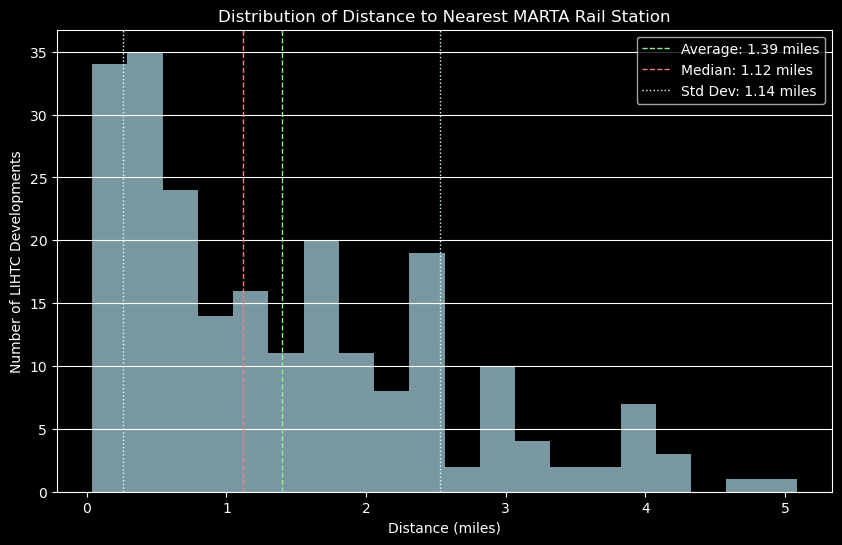

In [7]:
# Set the style to dark background
plt.style.use('dark_background')

# Create a histogram
plt.figure(figsize=(10, 6))
bars = plt.hist(transit_df['DIST_MILES'], bins=20, color='lightblue', alpha=0.7)

# Calculate and add average, median, and standard deviation
average_dist = transit_df['DIST_MILES'].mean()
median_dist = transit_df['DIST_MILES'].median()
std_dev_dist = transit_df['DIST_MILES'].std()

plt.axvline(average_dist, color='lightgreen', linestyle='dashed', linewidth=1, label=f'Average: {average_dist:.2f} miles')
plt.axvline(median_dist, color='lightcoral', linestyle='dashed', linewidth=1, label=f'Median: {median_dist:.2f} miles')
plt.axvline(average_dist + std_dev_dist, color='lightcyan', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev_dist:.2f} miles')
plt.axvline(average_dist - std_dev_dist, color='lightcyan', linestyle='dotted', linewidth=1)

# Remove vertical grid lines
plt.grid(axis='y')

# Add labels and title
plt.title('Distribution of Distance to Nearest MARTA Rail Station')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of LIHTC Developments')

# Add legend
plt.legend()

# Show plot
plt.show()


#### I have a shapefile of the Atlanta City Limits on my computer. I'm going to use that to select LIHTC developments only inside these city limits.

In [8]:
# Read the Atlanta city limits shapefile into a GeoDataFrame
gdf_atlanta = gpd.read_file('Final_Project/Lab1_Data/Atlanta_City_Limits.shp')

# Convert latitude and longitude columns in df_atl to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df_atl['longitude'], df_atl['latitude'])]
gdf_points = gpd.GeoDataFrame(df_atl, geometry=geometry, crs=gdf_atlanta.crs)

# Perform a spatial join to determine which points fall within Atlanta's city limits
df_atl_within_atlanta = gpd.sjoin(gdf_points, gdf_atlanta, how='inner', op='within')

# Now df_atl_within_atlanta contains only the entries within Atlanta's city limits
df_atl_within_atlanta

/Users/dkrasnerjust/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,index_right,ID,ACRES,SQ_MILES,LABEL,SHAPE_Leng,SHAPE_Area,OBJECTID_1,OBJECTID,GLOBALID
10079,GAA00000012,"CARVER SENIOR BUILDING, LP",217 THIRKIELD AVE SW,ATLANTA,GA,30315,GA0305-454,33.713478,-84.392693,150.0,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
10080,GAA00000013,CENTENNIAL PLACE 1,526 CENTENNIAL OLYMPIC PARK DR NW,ATLANTA,GA,30313,GA1012-479,33.768631,-84.392242,150.0,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
10100,GAA00000195,GATEWAY APARTMENTS AT NORTHSIDE VILLAGE,370 NORTHSIDE DR NW,ATLANTA,GA,30318,GA-02-559,33.765217,-84.404442,150.0,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
10101,GAA00000400,SUMMIT TRAIL,2045 GRAHAM CIR SE,ATLANTA,GA,30316,GA-2007-308,33.727051,-84.322342,150.0,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
10106,GAA0000X002,"416-418 ATWOOD STREET., S.W.",432 ATWOOD ST SW # 434,ATLANTA,GA,30310-1644,1991-080,33.743237,-84.428612,NaN,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,GAA20210002,ABBNGTN CHESHIRE BRDG,2070 CHESIRE BRIDGE ROAD NE,ATLANTA (FULTON),GA,30324-4242,2018-046,33.812172,-84.355309,NaN,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
11588,GAA20210022,HERNDON HOMES SENIORS,464 CAMERON MADISON ALEXANDER BOULEVARD NW,ATLANTA (FULTON),GA,30318-0000,2018-548,33.741688,-84.364975,NaN,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
11593,GAA20210027,MARIETTA SENIOR TOWER,2295 MARIETTA RD NW,ATLANTA (FULTON),GA,30318-1900,2018-534,33.818317,-84.461456,NaN,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
11596,GAA20210030,PEACHTREE SENIOR TOWER,2240 PEACHTREE ROAD,ATLANTA (FULTON),GA,30309-1124,2018-514,33.815231,-84.391708,NaN,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}


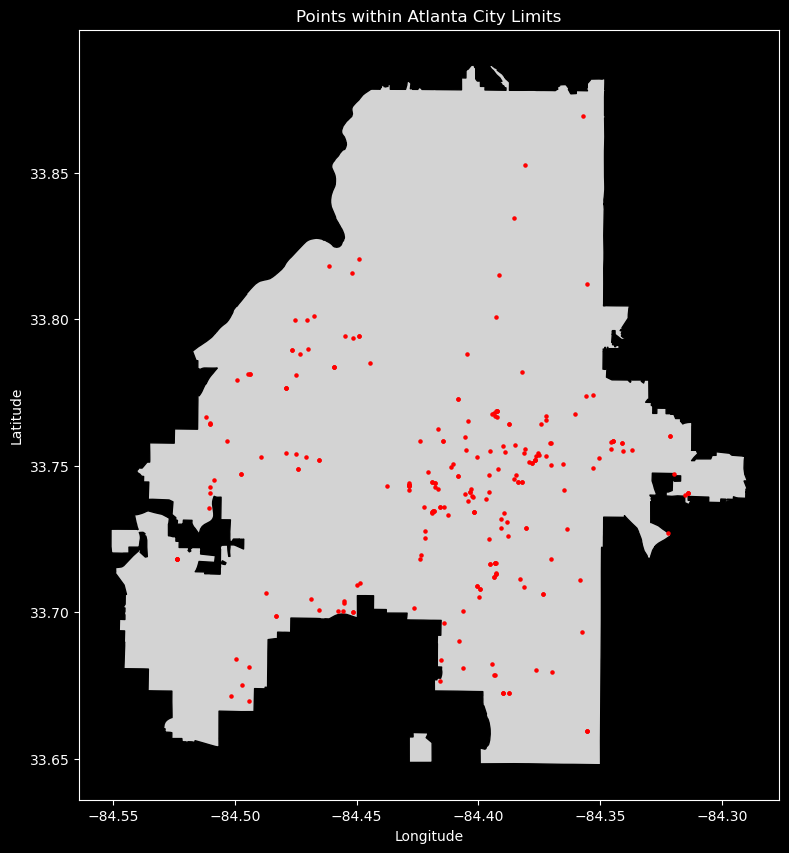

In [9]:
# Plot the Atlanta city limits
fig, ax = plt.subplots(figsize=(10, 10))
gdf_atlanta.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the points within Atlanta's city limits
df_atl_within_atlanta.plot(ax=ax, color='red', markersize=5)

# Set plot title
plt.title('Points within Atlanta City Limits')

# Set axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()


#### Some of these entries are no longer monitored by HUD's LIHTC program for various reasons, I want to filter them out and have their counts separately in a table

In [10]:
# Filter out instances based on conditions
monitored_units = df_atl_within_atlanta[~((df_atl_within_atlanta['yr_pis'] == 8888) | 
                                          (df_atl_within_atlanta['yr_pis'] == 9999) | 
                                          (df_atl_within_atlanta['nonprog'] == 1))]

# Count instances excluded by each condition
status_not_confirmed_count = df_atl_within_atlanta[df_atl_within_atlanta['yr_pis'] == 8888].shape[0]
missing_year_count = df_atl_within_atlanta[df_atl_within_atlanta['yr_pis'] == 9999].shape[0]
no_longer_monitored_count = df_atl_within_atlanta[df_atl_within_atlanta['nonprog'] == 1].shape[0]

# Create a separate table for counts
excluded_counts = pd.DataFrame({
    'Condition': ['Service Status Not Confirmed', 'Placed in Service Status Confirmed, Year Missing', 'No Longer Monitored'],
    'Count': [status_not_confirmed_count, missing_year_count, no_longer_monitored_count]
})

# Display the counts
print("Counts of Excluded Instances:")
excluded_counts

Counts of Excluded Instances:


,Condition,Count
0,Service Status Not Confirmed,4
1,"Placed in Service Status Confirmed, Year Missing",15
2,No Longer Monitored,16


In [11]:
# View data frame of monitored units
monitored_units

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,...,index_right,ID,ACRES,SQ_MILES,LABEL,SHAPE_Leng,SHAPE_Area,OBJECTID_1,OBJECTID,GLOBALID
10271,GAA19910005,GREENWICH STREET APARTMENTS,1241 GREENWICH ST SW,ATLANTA,GA,30310,GA-91-078,33.744019,-84.428375,150.0,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
10272,GAA19910010,432-434 ATWOOD ST SW,432 ATWOOD ST SW,ATLANTA,GA,30310,GA-91-080,33.743237,-84.428612,150.0,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
10274,GAA19910020,426-428 ATWOOD ST SW,426 ATWOOD ST SW,ATLANTA,GA,30310,GA-91-081,33.743378,-84.428612,150.0,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
10275,GAA19910030,494-496 ATWOOD ST SW,494 ATWOOD ST SW,ATLANTA,GA,30310,GA-91-079,33.741673,-84.428665,150.0,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
10282,GAA19910070,BIENVENUE PLACE,963 PONCE DE LEON AVE NE,ATLANTA,GA,30306,GA-91-083,33.773666,-84.356049,150.0,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,GAA20210002,ABBNGTN CHESHIRE BRDG,2070 CHESIRE BRIDGE ROAD NE,ATLANTA (FULTON),GA,30324-4242,2018-046,33.812172,-84.355309,NaN,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
11588,GAA20210022,HERNDON HOMES SENIORS,464 CAMERON MADISON ALEXANDER BOULEVARD NW,ATLANTA (FULTON),GA,30318-0000,2018-548,33.741688,-84.364975,NaN,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
11593,GAA20210027,MARIETTA SENIOR TOWER,2295 MARIETTA RD NW,ATLANTA (FULTON),GA,30318-1900,2018-534,33.818317,-84.461456,NaN,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}
11596,GAA20210030,PEACHTREE SENIOR TOWER,2240 PEACHTREE ROAD,ATLANTA (FULTON),GA,30309-1124,2018-514,33.815231,-84.391708,NaN,...,0,0,85716.6,135.88,Atlanta,195332.082957,5.087286e+08,1,1,{6999F328-8F07-4EE0-BF8C-4DB531A3898C}


#### From the remaining monitored units, I now have to create two new columns that identify what year the development will expire at the hypothetical 15 and 30 year marks.

In [12]:
# Select hud_id and yr_pis columns from monitored_units DataFrame
expiration_years = monitored_units[['hud_id', 'yr_pis']].copy()

# Calculate expiration years
expiration_years['exp_15'] = expiration_years['yr_pis'] + 15
expiration_years['exp_30'] = expiration_years['yr_pis'] + 30

expiration_years

,hud_id,yr_pis,exp_15,exp_30
10271,GAA19910005,1991,2006,2021
10272,GAA19910010,1991,2006,2021
10274,GAA19910020,1991,2006,2021
10275,GAA19910030,1991,2006,2021
10282,GAA19910070,1991,2006,2021
...,...,...,...,...
11568,GAA20210002,2021,2036,2051
11588,GAA20210022,2021,2036,2051
11593,GAA20210027,2021,2036,2051
11596,GAA20210030,2021,2036,2051


#### I can also graph this as a stacked histogram.

#### Green is the year placed in service.
#### Red is the worst case scenario - if the units expire 15 years after they were placed in service.
#### Yellow is the better case scenario that we would have to plan for - having the maximum 30 years of affordability.

#### For each individual unit, it could be EITHER red OR yellow, but not both. The stacking isn't meant to give exact numbers, just an understanding of when things will expire over time given the two possible scenarios.

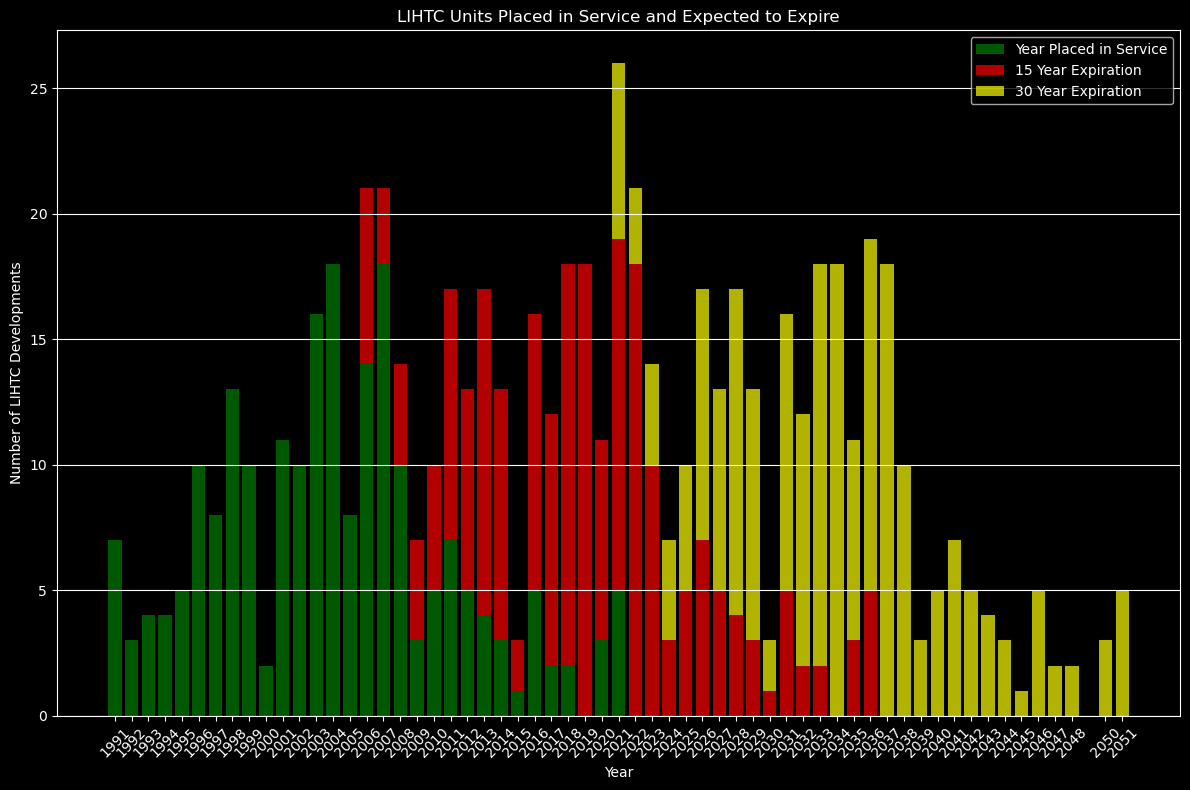

In [13]:
# Aggregate data by yr_pis, exp_15, and exp_30 and count occurrences
yr_pis_counts = expiration_years['yr_pis'].value_counts().sort_index()
exp_15_counts = expiration_years['exp_15'].value_counts().sort_index()
exp_30_counts = expiration_years['exp_30'].value_counts().sort_index()

# Get unique years from all counts
all_years = sorted(set(yr_pis_counts.index) | set(exp_15_counts.index) | set(exp_30_counts.index))

# Combine counts for all years
all_counts = pd.DataFrame({'yr_pis': yr_pis_counts, 'exp_15': exp_15_counts, 'exp_30': exp_30_counts}).fillna(0)
total_counts = all_counts.sum(axis=1)

# Plot stacked bar graph
plt.figure(figsize=(12, 8))
plt.bar(all_years, all_counts['yr_pis'], color='green', label='Year Placed in Service', alpha=0.7)
plt.bar(all_years, all_counts['exp_15'], color='red', label='15 Year Expiration', bottom=all_counts['yr_pis'], alpha=0.7)
plt.bar(all_years, all_counts['exp_30'], color='yellow', label='30 Year Expiration', bottom=all_counts['yr_pis'] + all_counts['exp_15'], alpha=0.7)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of LIHTC Developments')
plt.title('LIHTC Units Placed in Service and Expected to Expire')
plt.legend()

# Show plot
plt.xticks(all_years, rotation=45)
plt.grid(axis='y')  # Only horizontal grid lines
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('lihtc_units_plot.png', dpi=300)  # dpi specifies the resolution in dots per inch
plt.show()

#### When I return to this, there might be a way to graph this instead as a retention graph such as __[this](https://www.google.com/imgres?imgurl=https://1.bp.blogspot.com/-hR1AtC-J_uk/XwF14ypVd1I/AAAAAAAAQoo/A9a4psA-lGcZUDUN10Mqz0k_Wt3cCd4lwCK4BGAsYHg/s655/retention2.png&tbnid=pZOa9PHXp1No4M&vet=1&imgrefurl=https://www.mobilespoon.net/2019/07/cohort-analysis-retention-rate.html&docid=OCB_uoYg42Ij2M&w=655&h=459&hl=en-US&source=sh/x/im/m1/3&kgs=f16be17760c7f596&shem=abc,tric)__.

#### Alternatively, there might be an option to keep it a histograph, but make it vertical. The green graph could come out to the right side and the red and yellow could come out to the left side. A running difference to show the net number of units could be placed somewhere to indicate how many LIHTC units are in service at any given year.